# Background Removal using OpenCV

## Importing Libraries

In [65]:
import cv2 as cv
import os
import numpy as np

import matplotlib.pyplot as plt

## Reading the Image

In [66]:
imgs_path = os.path.join("D:\\Team4", 'data/qsd2_w3')
print(imgs_path)

D:\Team4\data/qsd2_w3


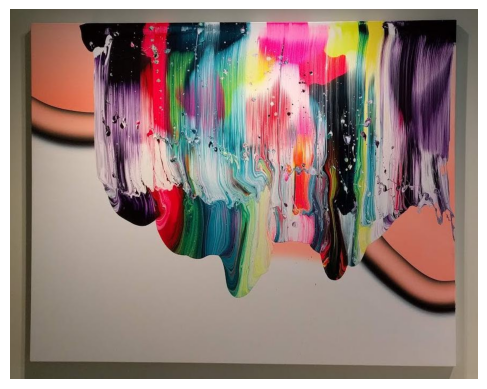

In [67]:
img = cv.imread(os.path.join(imgs_path, '00021.jpg'))
assert img is not None, "file could not be read, check with os.path.exists()"

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Background Removal

In [68]:
mask = np.zeros(img.shape[:2], np.uint8)

# Define background and foreground models
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# Define rectangle (x, y, width, height) around the artwork
height, width = img.shape[:2]
rect = (10, 10, width-20, height-20)  # Adjust as needed

# Apply GrabCut
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

cv.imshow('Mask', mask*80)
cv.waitKey(0)

# Create mask where sure and likely foreground are 1
mask2 = np.where((mask==cv.GC_FGD) | (mask==cv.GC_PR_FGD), 1, 0).astype('uint8')

# Display mask
cv.imshow('Mask', mask2*255)
cv.waitKey(0)

# Opening + Closing to remove noise
kernel = np.ones((3, 3), np.uint8)
mask2 = cv.morphologyEx(mask2, cv.MORPH_OPEN, kernel)
mask2 = cv.morphologyEx(mask2, cv.MORPH_CLOSE, kernel)

# Display mask
cv.imshow('Mask', mask2*255)
cv.waitKey(0)

# Extract foreground
foreground = img * mask2[:, :, np.newaxis]

cv.imshow('Foreground', foreground)
cv.waitKey(0)

13